In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys

In [3]:
from numpy.polynomial.polynomial import Polynomial

In [4]:
poly = Polynomial([1,0,0,0,0,1])

In [5]:
der = poly.deriv()
der

Polynomial([ 0.,  0.,  0.,  0.,  5.], [-1.,  1.], [-1.,  1.])

In [6]:
poly.roots()

array([-1.00000000+0.j        , -0.30901699-0.95105652j,
       -0.30901699+0.95105652j,  0.80901699-0.58778525j,
        0.80901699+0.58778525j])

In [7]:
def dist(roots,point):
    return np.abs(roots-point)

In [8]:
dist(poly.roots(),1+1j)

array([ 2.23606798,  2.34949931,  1.30993166,  1.59922998,  0.45430772])

In [9]:
def get_jacobian(deriv,point):
    value = deriv(point)
    return np.array([[np.real(value),np.imag(value)],
                     [np.imag(value),np.real(value)]])

In [10]:
def get_coeffs(poly,point):
    value = poly(point)
    return np.array([np.real(value),np.imag(value)])

In [11]:
def get_delta(poly,deriv,point):
    return -poly(point)/deriv(point)

In [12]:
def newton(poly,deriv,roots,start,max_num=50,tolerance=1e-3):
    num = 0
    point = start
    min_dist = np.inf
    min_root = -1
    for i in range(max_num):
        dists = dist(roots,point)
        min_dist = min(dists)
        min_root = argmin(dists)
        if min_dist < tolerance:
            break
        point += get_delta(poly,deriv,point)
        num += 1
    return num, min_root, min_dist
        

In [13]:
def get_image(poly,deriv=None,roots=None,size = 200,rang = 2., colors = None, center = (0.,0.), rotation = 0.0, printing = False):
    if printing:
        print '|',
        for i in range(4):
            print '---------------', (i+1)*20, '%',
        print '--------------- |'
        print '|',
    img = np.zeros(shape=(size,size,3),dtype = float)
    

    if colors is None:
        colors = np.array(
            [[200.,0.,100.],
             [100.,200.,0.],
             [100.,0.,200.],
             [200.,100.,0.],
             [0.,200.,100.]])
    
    if deriv is None:
        deriv = poly.deriv()
    
    
    if roots is None:
        roots = poly.roots()

    for i in range(size):
        for j in range(size):
            point = float(i)/size*rang-rang/2. - center[1] + 1j* (float(j)/size*rang-rang/2. + center[0])
            darken, color, min_dist = newton(poly,deriv,roots,complex64(point*(sin(rotation) + 1j * cos(rotation))),tolerance=1e-3)
            img[i,j] = colors[color] - darken*5.0
        if (i+1) % (size/50) == 0 and printing:
            print "#",
        
    if printing:
        print '|'
    return img

| --------------- 20 % --------------- 40 % --------------- 60 % --------------- 80 % --------------- |
| # # # # # # # # # # # # # # # # # # # # # # # # 

d:\anac\lib\site-packages\IPython\kernel\__main__.py:2: RuntimeWarning: divide by zero encountered in cdouble_scalars
  from IPython.kernel.zmq import kernelapp as app
d:\anac\lib\site-packages\IPython\kernel\__main__.py:2: RuntimeWarning: invalid value encountered in cdouble_scalars
  from IPython.kernel.zmq import kernelapp as app
d:\anac\lib\site-packages\numpy\polynomial\_polybase.py:292: RuntimeWarning: invalid value encountered in multiply
  arg = off + scl*arg


# # # # # # # # # # # # # # # # # # # # # # # # # # |


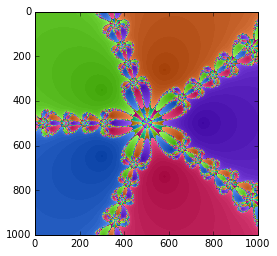

In [14]:
size = 1000
img = get_image(poly, size = size, rang=4., center = (0,0), rotation= 0, printing = True)
imshow(img)
name = "obrazek {0:d}"
imsave(name.format(size),img)

In [15]:
def save_animation(poly,size,move_x,move_y,zoom,rotation,steps,stepsize):
    deriv = poly.deriv()
    roots = poly.roots()
    t = 0.0
    for i in range(steps):
        z = zoom(t)
        x = move_x(t)
        y = move_y(t)
        r = rotation(t)
        print "Generating image ", i
        img = get_image(poly,deriv = deriv, roots = roots, size = size, rang = z, center = (x,y), rotation = r, printing = True)
        imsave('anim_{0:d}'.format(i),img)
        t += stepsize

In [17]:
save_animation(poly,
               256,
               lambda x: sin(x),
               lambda x: cos(x),
               lambda x: sin(x)+2,
               lambda x: x/(2.0*3.14),
               steps = 100, stepsize = 2*3.14/100)

 Generating image  0
| --------------- 20 % --------------- 40 % --------------- 60 % --------------- 80 % --------------- |
| # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # |
Generating image  1
| --------------- 20 % --------------- 40 % --------------- 60 % --------------- 80 % --------------- |
| # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # |
Generating image  2
| --------------- 20 % --------------- 40 % --------------- 60 % --------------- 80 % --------------- |
| # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # |
Generating image  3
| --------------- 20 % --------------- 40 % --------------- 60 % --------------- 80 % --------------- |
| # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # |
Generating image  4
| --------------- 20 % --------------- 40 % ---------------